# Luminaria - Clustering a Dataset

## Introducción
Después de obtener suficientes registros de encuestas de Luminaria, se hara un analisis de sobre los clusteres generador automaticamente con un algoritmo de K-means

Si bien se puede mediante un etiquetado manual, o por medio de un script de etiquetado, consideramos que debemos adaptar nuestras métricas a los resultados reales obtenidos en el ITD, para obtener resultados más adelante con un modelo de aprendizaje automático más precisas.



## Información General

- **Dataset**: Encuesta de riesgo de deserción estudiantil ITD
- **Tamaño de muestra**: ~150 registros
- **Tipo de análisis**: Clustering (K-means) + Clasificación (SVM, Naive Bayes)
- **Objetivo**: Identificar estudiantes en riesgo de deserción y patrones de comportamiento

---

## Variables del Dataset

### 1. Semestre Actual

**Nombre de variable**: `semestre`  
**Columna codificada**: `semestre_ord`  
**Tipo**: Ordinal  
**Pregunta original**: *"¿En qué semestre te encuentras actualmente?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| 1°-3° | 1 | Estudiante de primer ciclo - Recién ingresado |
| 4°-6° | 2 | Estudiante de ciclo intermedio - En desarrollo |
| 7° o más | 3 | Estudiante avanzado - Próximo a egresar |

---

### 2. Desmotivación Académica

**Nombre de variable**: `desmotivacion`  
**Columna codificada**: `desmotivacion_bin`  
**Tipo**: Binario  
**Pregunta original**: *"¿Te has sentido desmotivado(a) para continuar tus estudios en el ITD en los últimos 6 meses?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| No | 0 | No presenta desmotivación - Estado emocional favorable |
| Sí | 1 | **Presenta desmotivación - INDICADOR DE RIESGO ALTO** |

---

### 3. Consideración de Abandono

**Nombre de variable**: `considerado_abandonar`  
**Columna codificada**: `considerado_abandonar_bin`  
**Tipo**: Binario  
**Pregunta original**: *"¿Alguna vez has considerado abandonar la carrera?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| No | 0 | Nunca ha considerado abandonar - Compromiso firme con la carrera |
| Sí | 1 | **Ha considerado abandonar - INDICADOR DE RIESGO CRÍTICO** |

---

### 4. Dificultades Económicas

**Nombre de variable**: `dificultades_economicas`  
**Columna codificada**: `dificultades_economicas_bin`  
**Tipo**: Binario  
**Pregunta original**: *"¿Presentas dificultades económicas para cubrir tus gastos escolares?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| No | 0 | No presenta dificultades económicas - Estabilidad financiera |
| Sí | 1 | Presenta dificultades económicas - Factor de riesgo socioeconómico |


---

### 5. Situación Laboral

**Nombre de variable**: `empleo`  
**Columna codificada**: `empleo_ord`  
**Tipo**: Ordinal  
**Pregunta original**: *"¿Tienes un empleo además de estudiar?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| No | 0 | No trabaja - Dedicación exclusiva a estudios |
| Sí, medio tiempo | 1 | Trabaja medio tiempo - Balance entre trabajo y estudio |
| Sí, tiempo completo | 2 | Trabaja tiempo completo - Alta carga laboral + académica |


---

### 6. Impacto Laboral en Rendimiento

**Nombre de variable**: `impacto_laboral`  
**Columna codificada**: `impacto_laboral_ord`  
**Tipo**: Ordinal  
**Pregunta original**: *"¿Consideras que tus responsabilidades laborales afectan tu rendimiento académico?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| No afecta / No trabajo | 0 | No hay impacto laboral - Rendimiento académico no comprometido |
| Algo | 1 | Impacto moderado - Alguna interferencia trabajo-estudio |
| Sí, mucho | 2 | **Impacto severo - Trabajo afecta significativamente el rendimiento** |


---

### 7. Reprobación de Materias

**Nombre de variable**: `reprobo_materias`  
**Columna codificada**: `reprobo_materias_bin`  
**Tipo**: Binario  
**Pregunta original**: *"¿Has reprobado alguna materia en el último semestre escolar?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| No | 0 | No reprobó materias - Buen rendimiento académico |
| Sí | 1 | **Reprobó al menos una materia - INDICADOR DE RIESGO ACADÉMICO** |

---

### 8. Apoyo Institucional Percibido

**Nombre de variable**: `apoyo_institucional`  
**Columna codificada**: `apoyo_institucional_ord`  
**Tipo**: Ordinal  
**Pregunta original**: *"¿Te sientes apoyado/a por el personal docente y administrativo del ITD?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| Nunca | 0 | **Nunca se siente apoyado - Desconexión total con la institución** |
| Algunas veces | 1 | Apoyo intermitente - Conexión institucional moderada |
| Siempre | 2 | Siempre se siente apoyado - Fuerte vínculo institucional |


---

### 9. Satisfacción con Servicios Institucionales

**Nombre de variable**: `satisfaccion_servicios`  
**Columna codificada**: `satisfaccion_servicios_ord`  
**Tipo**: Ordinal (Escala Likert de 4 niveles)  
**Pregunta original**: *"¿Cómo calificarías tu satisfacción con los servicios del ITD (biblioteca, laboratorios, instalaciones, etc.)?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| Muy insatisfecho/a | 0 | **Percepción muy negativa de servicios institucionales** |
| Insatisfecho/a | 1 | Percepción negativa de servicios |
| Satisfecho/a | 2 | Percepción positiva de servicios |
| Muy satisfecho/a | 3 | Percepción muy positiva de servicios |

---

### 10. Participación en Actividades Extracurriculares

**Nombre de variable**: `actividades_extracurriculares`  
**Columna codificada**: `actividades_extracurriculares_ord`  
**Tipo**: Ordinal  
**Pregunta original**: *"¿Participas en actividades extracurriculares (deporte, cultura, talleres) dentro del ITD?"*

| Valor Original | Código | Descripción |
|----------------|--------|-------------|
| Nunca | 0 | **Nunca participa - No integración en vida universitaria** |
| Algunas veces | 1 | Participación ocasional - Integración social moderada |
| Sí, frecuentemente | 2 | Participación frecuente - Fuerte integración social |

---

## Resumen de Variables para K-means

### Lista de Features

```python
features_kmeans = [
    'semestre_ord',                      # [1, 3]
    'desmotivacion_bin',                 # [0, 1] - CRÍTICO
    'considerado_abandonar_bin',         # [0, 1] - CRÍTICO
    'dificultades_economicas_bin',       # [0, 1] - ALTO
    'empleo_ord',                        # [0, 2]
    'impacto_laboral_ord',               # [0, 2] - ALTO
    'reprobo_materias_bin',              # [0, 1] - ALTO
    'apoyo_institucional_ord',           # [0, 2] - PROTECTORA
    'satisfaccion_servicios_ord',        # [0, 3] - PROTECTORA
    'actividades_extracurriculares_ord'  # [0, 2] - PROTECTORA
]


## Desarrollo


### Importar librerias y cargar datos


In [32]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
df = pd.read_csv('datasets/Datos de luminaria - Respuestas de formulario 231.csv')
df.drop(columns=['Marca temporal'], inplace=True)
df.drop(columns=['Dirección de correo electrónico'], inplace=True)
df.head()

,¿En qué semestre te encuentras actualmente?,¿Te has sentido desmotivado(a) para continuar tus estudios en el ITD en los últimos 6 meses?,¿Alguna vez has considerado abandonar la carrera?,¿Presentas dificultades económicas para cubrir tus gastos escolares?,¿Tienes un empleo además de estudiar?,¿Consideras que tus responsabilidades laborales afectan tu rendimiento académico?,¿Has reprobado alguna materia en el último semestre escolar?,¿Te sientes apoyado/a por el personal docente y administrativo del ITD?,¿Cómo calificarías tu satisfacción con los servicios del ITD?,"¿Participas en actividades extracurriculares (deporte, cultura, talleres) dentro del ITD?"
0,7mo o más,No,Sí,No,"Sí, medio tiempo",Algo,No,Algunas veces,Insatisfecho/a,Algunas veces
1,7mo o más,No,Sí,Sí,"Sí, medio tiempo",Algo,No,Siempre,Insatisfecho/a,"Sí, frecuentemente"
2,1er - 3er,Si,Sí,Sí,No,Algo,No,Algunas veces,Insatisfecho/a,Nunca
3,1er - 3er,Si,No,Sí,"Sí, medio tiempo",Algo,No,Algunas veces,Satisfecho/a,Algunas veces
4,7mo o más,No,No,No,"Sí, medio tiempo",No afecta/No trabajo,No,Algunas veces,Satisfecho/a,"Sí, frecuentemente"


Renombrar las columnas para manejarlas más facilmente

In [34]:
rename_mapping = {
    "¿En qué semestre te encuentras actualmente?": "semestre_ord",
    "¿Te has sentido desmotivado(a) para continuar tus estudios en el ITD en los últimos 6 meses?": "desmotivacion_bin",
    "¿Alguna vez has considerado abandonar la carrera?": "considerado_abandonar_bin",
    "¿Presentas dificultades económicas para cubrir tus gastos escolares?": "dificultades_economicas_bin",
    "¿Tienes un empleo además de estudiar?": "empleo_ord",
    "¿Consideras que tus responsabilidades laborales afectan tu rendimiento académico?": "impacto_laboral_ord",
    "¿Has reprobado alguna materia en el último semestre escolar?": "reprobo_materias_bin",
    "¿Te sientes apoyado/a por el personal docente y administrativo del ITD?": "apoyo_institucional_ord",
    "¿Cómo calificarías tu satisfacción con los servicios del ITD?": "satisfaccion_servicios_ord",
    "¿Participas en actividades extracurriculares (deporte, cultura, talleres) dentro del ITD?": "actividades_extracurriculares_ord"
}

# Renombrar columnas
df = df.rename(columns=rename_mapping)

# Verificar los nuevos nombres de columnas
print("Nuevas columnas:")
print(df.columns.tolist())

Nuevas columnas:
['semestre_ord', 'desmotivacion_bin', 'considerado_abandonar_bin', 'dificultades_economicas_bin', 'empleo_ord', 'impacto_laboral_ord', 'reprobo_materias_bin', 'apoyo_institucional_ord', 'satisfaccion_servicios_ord', 'actividades_extracurriculares_ord']


In [35]:
df.head()

,semestre_ord,desmotivacion_bin,considerado_abandonar_bin,dificultades_economicas_bin,empleo_ord,impacto_laboral_ord,reprobo_materias_bin,apoyo_institucional_ord,satisfaccion_servicios_ord,actividades_extracurriculares_ord
0,7mo o más,No,Sí,No,"Sí, medio tiempo",Algo,No,Algunas veces,Insatisfecho/a,Algunas veces
1,7mo o más,No,Sí,Sí,"Sí, medio tiempo",Algo,No,Siempre,Insatisfecho/a,"Sí, frecuentemente"
2,1er - 3er,Si,Sí,Sí,No,Algo,No,Algunas veces,Insatisfecho/a,Nunca
3,1er - 3er,Si,No,Sí,"Sí, medio tiempo",Algo,No,Algunas veces,Satisfecho/a,Algunas veces
4,7mo o más,No,No,No,"Sí, medio tiempo",No afecta/No trabajo,No,Algunas veces,Satisfecho/a,"Sí, frecuentemente"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   semestre_ord                       231 non-null    object
 1   desmotivacion_bin                  231 non-null    object
 2   considerado_abandonar_bin          231 non-null    object
 3   dificultades_economicas_bin        231 non-null    object
 4   empleo_ord                         231 non-null    object
 5   impacto_laboral_ord                231 non-null    object
 6   reprobo_materias_bin               231 non-null    object
 7   apoyo_institucional_ord            231 non-null    object
 8   satisfaccion_servicios_ord         231 non-null    object
 9   actividades_extracurriculares_ord  231 non-null    object
dtypes: object(10)
memory usage: 18.2+ KB


In [37]:
df['impacto_laboral_ord'].value_counts()

impacto_laboral_ord
No afecta/No trabajo    144
Algo                     68
Sí, mucho                19
Name: count, dtype: int64

### Creación de codificador
Basado en en las reglas de ./agent/encoding_kmean.json

Codificamos con ordinal y con OneHotEncoder, dependiendo de la variable. Además se aplica una estandarización, requisito para K-means
 

In [38]:
class VariableEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mappings = {
            'semestre_ord': {'1er - 3er': 1, '4to - 6to': 2, '7mo o más': 3},
            'desmotivacion_bin': {'Si': 1, 'No': 0},
            'considerado_abandonar_bin': {'Sí': 1, 'No': 0},
            'dificultades_economicas_bin': {'Sí': 1, 'No': 0},
            'empleo_ord': {'No': 0, 'Sí, medio tiempo': 1, 'Sí, tiempo completo': 2},
            'impacto_laboral_ord': {'No afecta/No trabajo': 0, 'Algo': 1, 'Sí, mucho': 2},
            'reprobo_materias_bin': {'Sí': 1, 'No': 0},
            'apoyo_institucional_ord': {'Nunca': 0, 'Algunas veces': 1, 'Siempre': 2},
            'satisfaccion_servicios_ord': {'Muy insatisfecho/a': 0, 'Insatisfecho/a': 1, 
                                         'Satisfecho/a': 2, 'Muy satisfecho/a': 3},
            'actividades_extracurriculares_ord': {'Nunca': 0, 'Algunas veces': 1, 'Sí, frecuentemente': 2}
        }
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        for column, mapping in self.mappings.items():
            X_encoded[column] = X_encoded[column].map(mapping)
        return X_encoded

In [39]:
# Pipeline de preprocesamiento
pipeline = Pipeline([
    ('encoder', VariableEncoder()),
    ('scaler', StandardScaler())
])

# Lista de variables a procesar
features = [
    'semestre_ord', 
    'desmotivacion_bin',
    'considerado_abandonar_bin',
    'dificultades_economicas_bin',
    'empleo_ord',
    'impacto_laboral_ord',
    'reprobo_materias_bin',
    'apoyo_institucional_ord',
    'satisfaccion_servicios_ord',
    'actividades_extracurriculares_ord'
]

In [40]:
# Aplicar el pipeline
X_transformed = pipeline.fit_transform(df[features])

# Convertir a DataFrame para mejor visualización
df_transformed = pd.DataFrame(
    X_transformed, 
    columns=features,
    index=df.index
)

In [41]:
# Verificar valores nulos en el DataFrame transformado
df_transformed.isna().sum()

semestre_ord                         0
desmotivacion_bin                    0
considerado_abandonar_bin            0
dificultades_economicas_bin          0
empleo_ord                           0
impacto_laboral_ord                  0
reprobo_materias_bin                 0
apoyo_institucional_ord              0
satisfaccion_servicios_ord           0
actividades_extracurriculares_ord    0
dtype: int64

In [42]:
print("Datos transformados:")
print(df_transformed.head())

Datos transformados:
   semestre_ord  desmotivacion_bin  considerado_abandonar_bin  \
0      0.948460          -1.039750                   1.030776   
1      0.948460          -1.039750                   1.030776   
2     -1.357795           0.961769                   1.030776   
3     -1.357795           0.961769                  -0.970143   
4      0.948460          -1.039750                  -0.970143   

   dificultades_economicas_bin  empleo_ord  impacto_laboral_ord  \
0                    -0.659380    0.902528             0.842214   
1                     1.516575    0.902528             0.842214   
2                     1.516575   -0.726253             0.842214   
3                     1.516575    0.902528             0.842214   
4                    -0.659380    0.902528            -0.714198   

   reprobo_materias_bin  apoyo_institucional_ord  satisfaccion_servicios_ord  \
0             -0.572351                -0.073647                   -1.035499   
1             -0.572351  

### K-means

In [43]:
from sklearn.cluster import KMeans

# K-means, con 3 clusters
# Anteriormente se hizo un análisis de codo para determinar el número óptimo de clusters
# 2 clusters no daba buena separación
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_transformed)


In [44]:
clusters

array([2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1], dtype=int32)

In [56]:
from collections import Counter
counter = Counter(clusters.tolist())

# for key in sorted(counter.keys()):
#     print("Label {0} has {1} samples - {2} are malicious samples".format(
#         key, counter[key], bad_counter[key]))

In [46]:
print("Cluster distribution:")
print(f'Primer cluster tiene {counter[0]} muestras')
print(f'Segundo cluster tiene {counter[1]} muestras')
print(f'Tercer cluster tiene {counter[2]} muestras')

Cluster distribution:
Primer cluster tiene 94 muestras
Segundo cluster tiene 74 muestras
Tercer cluster tiene 63 muestras


In [47]:
df_transformed_with_clusters = df_transformed.copy()
df_transformed_with_clusters['cluster'] = clusters
df_transformed_with_clusters.head()

,semestre_ord,desmotivacion_bin,considerado_abandonar_bin,dificultades_economicas_bin,empleo_ord,impacto_laboral_ord,reprobo_materias_bin,apoyo_institucional_ord,satisfaccion_servicios_ord,actividades_extracurriculares_ord,cluster
0,0.948460,-1.039750,1.030776,-0.659380,0.902528,0.842214,-0.572351,-0.073647,-1.035499,0.255104,2
1,0.948460,-1.039750,1.030776,1.516575,0.902528,0.842214,-0.572351,1.816623,-1.035499,1.625547,2
2,-1.357795,0.961769,1.030776,1.516575,-0.726253,0.842214,-0.572351,-0.073647,-1.035499,-1.115339,1
3,-1.357795,0.961769,-0.970143,1.516575,0.902528,0.842214,-0.572351,-0.073647,0.507728,0.255104,2
4,0.948460,-1.039750,-0.970143,-0.659380,0.902528,-0.714198,-0.572351,-0.073647,0.507728,1.625547,0


In [48]:
df_with_clusters = df.copy()
df_with_clusters['cluster'] = clusters
df_with_clusters.head()

,semestre_ord,desmotivacion_bin,considerado_abandonar_bin,dificultades_economicas_bin,empleo_ord,impacto_laboral_ord,reprobo_materias_bin,apoyo_institucional_ord,satisfaccion_servicios_ord,actividades_extracurriculares_ord,cluster
0,7mo o más,No,Sí,No,"Sí, medio tiempo",Algo,No,Algunas veces,Insatisfecho/a,Algunas veces,2
1,7mo o más,No,Sí,Sí,"Sí, medio tiempo",Algo,No,Siempre,Insatisfecho/a,"Sí, frecuentemente",2
2,1er - 3er,Si,Sí,Sí,No,Algo,No,Algunas veces,Insatisfecho/a,Nunca,1
3,1er - 3er,Si,No,Sí,"Sí, medio tiempo",Algo,No,Algunas veces,Satisfecho/a,Algunas veces,2
4,7mo o más,No,No,No,"Sí, medio tiempo",No afecta/No trabajo,No,Algunas veces,Satisfecho/a,"Sí, frecuentemente",0


### Visualización de los clusters

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

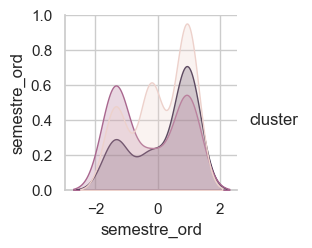

In [50]:
sns.pairplot(df_transformed_with_clusters[['semestre_ord', 'cluster']], hue='cluster', diag_kind='kde')

<Axes: xlabel='desmotivacion_bin', ylabel='Count'>

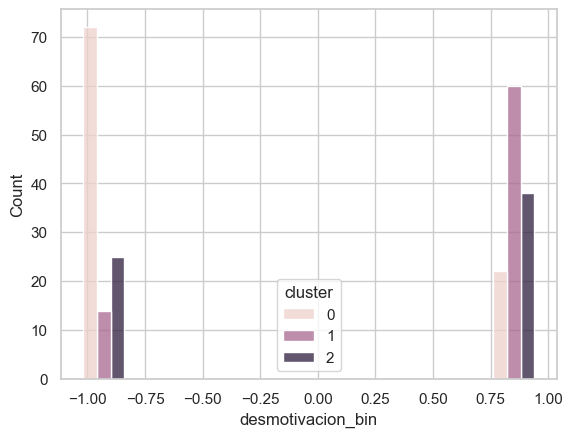

In [51]:
sns.histplot(data=df_transformed_with_clusters, x='desmotivacion_bin', hue='cluster', multiple='dodge', shrink=0.8)

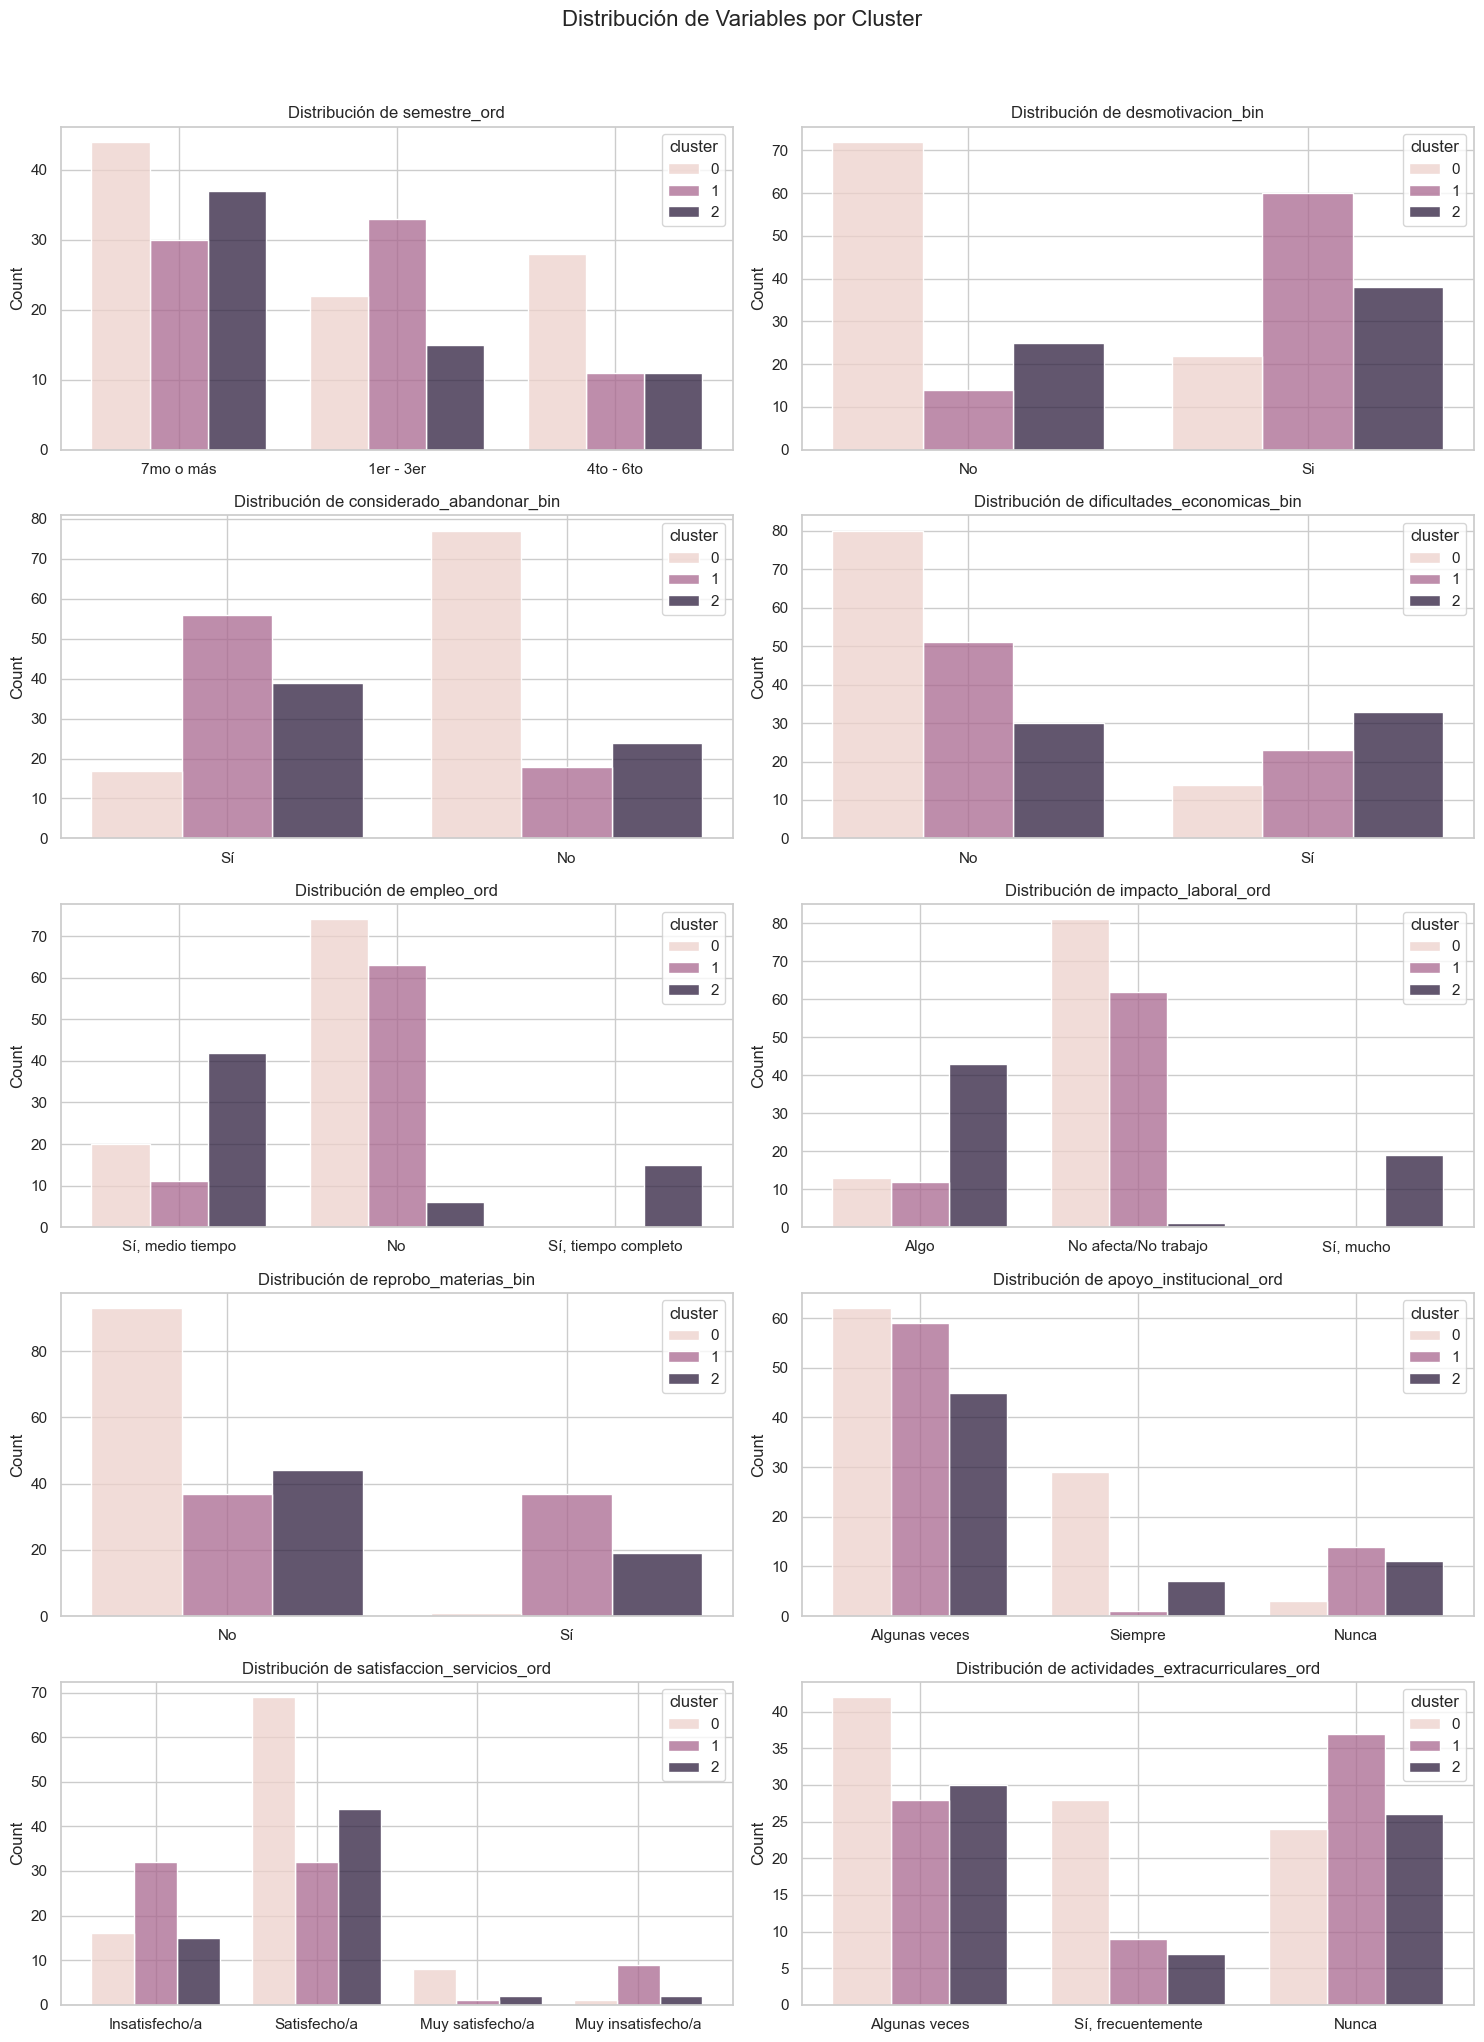

In [52]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Distribución de Variables por Cluster', fontsize=16, y=1.02)

# Aplanar el array de axes para iterar más fácilmente
axes = axes.ravel()

# Crear histogramas para cada variable
for idx, feature in enumerate(features):
    sns.histplot(
        data=df_with_clusters,
        x=feature,
        hue='cluster',
        multiple="dodge",
        shrink=0.8,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Distribución de {feature}')
    axes[idx].set_xlabel('')
    
# Ajustar el layout
plt.tight_layout()
plt.show()

## Analisis de Clusters Por Nivel de Riesgo

In [54]:
# Re-evaluar clusters y proponer mapping según estadísticas (ejecutar en el notebook)

# Features según JSON
features = [
    'semestre_ord','desmotivacion_bin','considerado_abandonar_bin',
    'dificultades_economicas_bin','empleo_ord','impacto_laboral_ord',
    'reprobo_materias_bin','apoyo_institucional_ord',
    'satisfaccion_servicios_ord','actividades_extracurriculares_ord'
]

# Mapeos del JSON (maneja variantes de acentos/formato)
m = {
    'desmotivacion_bin': {'Sí':1,'Si':1,'No':0},
    'considerado_abandonar_bin': {'Sí':1,'Si':1,'No':0},
    'dificultades_economicas_bin': {'Sí':1,'Si':1,'No':0},
    'reprobo_materias_bin': {'Sí':1,'Si':1,'No':0},
    'empleo_ord': {'No':0,'Sí, medio tiempo':1,'Si, medio tiempo':1,'Sí, tiempo completo':2,'Si, tiempo completo':2},
    'impacto_laboral_ord': {'No afecta / No trabajo':0,'No afecta/No trabajo':0,'Algo':1,'Sí, mucho':2,'Si, mucho':2},
    'apoyo_institucional_ord': {'Nunca':0,'Algunas veces':1,'Siempre':2},
    'satisfaccion_servicios_ord': {'Muy insatisfecho/a':0,'Insatisfecho/a':1,'Satisfecho/a':2,'Muy satisfecho/a':3},
    'actividades_extracurriculares_ord': {'Nunca':0,'Algunas veces':1,'Sí, frecuentemente':2,'Si, frecuentemente':2},
    'semestre_ord': {'1°-3°':1,'1er - 3er':1,'4°-6°':2,'4to - 6to':2,'7° o más':3,'7mo o más':3}
}

df_check = df_with_clusters.copy()

# Mapear solo si columna no es numérica
for col in features:
    if col in df_check.columns and not pd.api.types.is_numeric_dtype(df_check[col]):
        df_check[col] = df_check[col].map(m.get(col, {})).combine_first(pd.to_numeric(df_check[col], errors='coerce'))

# Mostrar medias por cluster (valores mayores en indicadores de riesgo -> más riesgo)
cluster_means = df_check.groupby('cluster')[features].mean().round(3)
print("Media de features por cluster:\n", cluster_means)

# Contar frecuencias 'Sí'/'No' para binarias (si están textuales en origen)
print("\nRecuento por cluster para variables binarias (si aplicable):")
for col in ['desmotivacion_bin','considerado_abandonar_bin','dificultades_economicas_bin','reprobo_materias_bin']:
    if col in df_with_clusters.columns:
        # si originales eran textos, mostrar proporción de 'Sí'
        vals = df_with_clusters.groupby('cluster')[col].apply(lambda s: (s=='Sí').sum() if s.dtype == object else (s==1).sum())
        print(f"{col} (n 'Sí' por cluster):\n{vals}\n")

# Puntaje simple ponderado (ajusta pesos si quieres)
pesos = {
    'desmotivacion_bin': 2.0,
    'considerado_abandonar_bin': 2.5,
    'dificultades_economicas_bin': 1.5,
    'impacto_laboral_ord': 1.5,
    'reprobo_materias_bin': 1.5,
    'apoyo_institucional_ord': -1.0,
    'satisfaccion_servicios_ord': -1.0,
    'actividades_extracurriculares_ord': -0.8,
    'empleo_ord': 0.2,
    'semestre_ord': 0.2
}
peso_vec = np.array([pesos[c] for c in cluster_means.columns])
scores = cluster_means.values.dot(peso_vec)
risk_score = pd.Series(scores, index=cluster_means.index).round(3).sort_values(ascending=False)
print("Puntaje de riesgo por cluster (mayor = mayor riesgo):\n", risk_score)

# Proponer mapping según orden de puntajes
ordered = risk_score.index.tolist()
propuesta = {ordered[0]:'Alto Riesgo', ordered[1]:'Riesgo Medio', ordered[2]:'Bajo Riesgo'}
print("\nPropuesta mapping cluster -> nivel_riesgo:\n", propuesta)

# Aplicar propuesta (si estás de acuerdo)
df_with_clusters['nivel_riesgo'] = df_with_clusters['cluster'].map(propuesta)
print("\nDistribución resultante:\n", df_with_clusters['nivel_riesgo'].value_counts())

Media de features por cluster:
          semestre_ord  desmotivacion_bin  considerado_abandonar_bin  \
cluster                                                               
0               2.234              0.234                      0.181   
1               1.959              0.811                      0.757   
2               2.349              0.603                      0.619   

         dificultades_economicas_bin  empleo_ord  impacto_laboral_ord  \
cluster                                                                 
0                              0.149       0.213                0.138   
1                              0.311       0.149                0.162   
2                              0.524       1.143                1.286   

         reprobo_materias_bin  apoyo_institucional_ord  \
cluster                                                  
0                       0.011                    1.277   
1                       0.500                    0.824   
2             

/tmp/ipykernel_8824/1048905725.py:30: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_check[col] = df_check[col].map(m.get(col, {})).combine_first(pd.to_numeric(df_check[col], errors='coerce'))
/tmp/ipykernel_8824/1048905725.py:30: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_check[col] = df_check[col].map(m.get(col, {})).combine_first(pd.to_numeric(df_check[col], errors='coerce'))
/tmp/ipykernel_8824/1048905725.py:30: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclud

### Cluster 0 - Riesgo Bajo
- Baja desmotivación
- Casi nula consideración de abandono
- Pocos casos de reprobación
- Alto apoyo institucional percibido
- Alta satisfacción con servicios
- Mayor participación en actividades extracurriculares
**Coincide con el perfil "cluster_bajo_riesgo" del JSON**

### Cluster 1 - Riesgo Medio
- Niveles intermedios de desmotivación
- Presenta algunos estudiantes que trabajan (empleo_ord)
- Impacto laboral moderado (impacto_laboral_ord) 
- Niveles medios de apoyo institucional
- Satisfacción moderada con servicios
**Coincide con el perfil "cluster_riesgo_medio" del JSON**

### Cluster 2 - Riesgo Alto
- Muestra niveles altos de desmotivación (desmotivacion_bin)
- Alta tasa de consideración de abandono (considerado_abandonar_bin)
- Mayores dificultades económicas (dificultades_economicas_bin)
- Bajo apoyo institucional percibido (apoyo_institucional_ord)
- Baja satisfacción con servicios (satisfaccion_servicios_ord)
- Poca participación en actividades extracurriculares
**Coincide con el perfil "cluster_alto_riesgo" del JSON**




## Exportar Dataset con etiquetas


In [58]:
# Crear un mapeo de clusters a niveles de riesgo
cluster_risk_mapping = {
    0: "Bajo Riesgo",
    1: "Medio Riesgo",
    2: "Alto Riesgo",
}

# Agregar columna de nivel de riesgo
df_with_clusters['nivel_riesgo'] = df_with_clusters['cluster'].map(cluster_risk_mapping)

# Mostrar distribución de niveles de riesgo
print("\nDistribución de estudiantes por nivel de riesgo:")
print(df_with_clusters['nivel_riesgo'].value_counts())


Distribución de estudiantes por nivel de riesgo:
nivel_riesgo
Bajo Riesgo     94
Medio Riesgo    74
Alto Riesgo     63
Name: count, dtype: int64


In [59]:
df_with_clusters.drop(columns=['cluster'], inplace=True)
df_with_clusters.head()

,semestre_ord,desmotivacion_bin,considerado_abandonar_bin,dificultades_economicas_bin,empleo_ord,impacto_laboral_ord,reprobo_materias_bin,apoyo_institucional_ord,satisfaccion_servicios_ord,actividades_extracurriculares_ord,nivel_riesgo
0,7mo o más,No,Sí,No,"Sí, medio tiempo",Algo,No,Algunas veces,Insatisfecho/a,Algunas veces,Alto Riesgo
1,7mo o más,No,Sí,Sí,"Sí, medio tiempo",Algo,No,Siempre,Insatisfecho/a,"Sí, frecuentemente",Alto Riesgo
2,1er - 3er,Si,Sí,Sí,No,Algo,No,Algunas veces,Insatisfecho/a,Nunca,Medio Riesgo
3,1er - 3er,Si,No,Sí,"Sí, medio tiempo",Algo,No,Algunas veces,Satisfecho/a,Algunas veces,Alto Riesgo
4,7mo o más,No,No,No,"Sí, medio tiempo",No afecta/No trabajo,No,Algunas veces,Satisfecho/a,"Sí, frecuentemente",Bajo Riesgo


In [60]:
df_with_clusters.to_csv('./datasets/luminaria_con_niveles_de_riesgo 231.csv', index=False)
print("Dataset exportado con niveles de riesgo.")

Dataset exportado con niveles de riesgo.


In [61]:
pd.read_csv('./datasets/luminaria_con_niveles_de_riesgo 231.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   semestre_ord                       231 non-null    object
 1   desmotivacion_bin                  231 non-null    object
 2   considerado_abandonar_bin          231 non-null    object
 3   dificultades_economicas_bin        231 non-null    object
 4   empleo_ord                         231 non-null    object
 5   impacto_laboral_ord                231 non-null    object
 6   reprobo_materias_bin               231 non-null    object
 7   apoyo_institucional_ord            231 non-null    object
 8   satisfaccion_servicios_ord         231 non-null    object
 9   actividades_extracurriculares_ord  231 non-null    object
 10  nivel_riesgo                       231 non-null    object
dtypes: object(11)
memory usage: 20.0+ KB
